<a href="https://colab.research.google.com/github/aeropressmaori/aeropressmaori/blob/Taller_Fourier_EDM/taller_fourier_practica_1_(estudiantes)MVieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Fourier EDM - Clasificación de cargas de electrodomésticos

## Práctica 1 - Python, manejo de datos, gráficas

### Objetivos:
En esta práctica se introducen algunas herramientas de manejo de datos en Python que van a ser útiles para las prácticas del curso


### Materiales

Links a tutoriales y recursos de Python en el eva del curso

### Trabajo a realizar

A lo largo del notebook encontraran las siguientes palabras claves:

* \# COMPLETAR  -> indica que se requiere completar el código. 
  
  
* \# EXPERIMENTAR -> indica que la celda contiene código funcional que permite experimentar variando el tipo de electrodoméstico, parámetros de las funciones, etc. Es posible, si lo requiere la experimentación duplicar la celda y realizar los cambio que sean de interés en el código.
  
  
* \# DISCUTIR -> se espera una discusión de los experimentos realizados y/o de las preguntas formuladas
  
  
  
* \# RESPONDER -> se espera una respuesta a preguntas concretas

## Parte 1 - Definición de los módulos a usar

In [1]:
# En esta celda se definen los modulos que se van a usar en el notebook 
# También se configuran otros aspectos comunes a toda la práctica

import os
import numpy as np
import pandas as pd
from scipy.fftpack import fft, fftshift, ifft
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

#estilo de las gráficas
plt.style.use('ggplot')

# FORMAS DE VER LAS GRAFICAS --------------------
# ELEGIR UNA DE LAS OPCIONES Y DES-COMENTAR (sacar # de la linea)
# ----------------
# a) graficas en línea  entre las celdas (no interactivo)
#%matplotlib inline
# ---------------- 
# b) graficas en línea  entre las celdas con pan/zoom
%matplotlib notebook
# ----------------
# c) graficas en ventanas externas (abre una ventana por cada figura)
# %matplotlib
# ----------------
# d) Si se usa "jupyter lab" en lugar de "jupyter notebook" usar %matplotlib widget en lugar de %matplotlib notebook 
# requiere instalar el modulo "ipympl". Ver https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab#56416229
# %matplotlib widget
#---------------------------------------------------

In [ ]:
# # Subida de archivo de datos si se usa Colab 
from google.colab import files
import io
datos = files.upload()

## Parte 2 - Creación de arrays en numpy

In [ ]:
print('-------------------------------------------------')
# Crear un array unidimensional
a = np.array([10, 20, 30, 40, 50])
print('array a')
# Imprimir el tipo de dato
print(a.dtype)
# Imprimir las dimensiones del array
print(a.shape)    


print('-------------------------------------------------')
# Crear un array bidimensional
b = np.array([[1.5, 2.3, 3], [4.44, 5.67, 6.88]])
print('array b')
print(b.dtype)
print(b.shape)
print(b)

print('-------------------------------------------------')
# Crear un array de un tipo de datos específico
c = np.array([[1,2,3],[4,5,6]], dtype = np.uint8)
print('array c:  tipo:',c.dtype)


print('-------------------------------------------------')
# Existen distintas funciones que permiten crear arrays en numpy
# Ej. np.ones(...), np.zeros(...), np.random.rand(...)
z = np.zeros((3,4))
print('array z\n', z)

print('-------------------------------------------------')
# string con formato 
np_array = b
info = 'tipo:{}, dimensión:{}, tamaño:{}'.format(np_array.dtype, np_array.ndim, np_array.shape)
print(np_array)
print(info)


In [ ]:
# EXPERIMENTAR Duplicar la celda de arriba y realizar pruebas  


In [ ]:
# EXPERIMENTAR con otras funciones como 
# np.arange(...), np.ones(...), np.random.rand(...), np.random.randint(...), np.eye(...) 

# Tip de jupyter notebook: SHIFT-TAB cuando el cusor está sobre una función muestra la ayuda

In [ ]:
print('-----------------------')
notas = np.arange(1, 13, 1)
print('np.arange: ', notas)
print('-----------------------')
unos = np.ones((3,4))
print('np.ones: ', unos)
print('-----------------------')
rand = np.random.rand(3,2)
print('np.random.rand: ', rand)
print('-----------------------')
rand_int = np.random.randint(5, size=(2,4))
print('np.random.randint: ', rand_int)
print('-----------------------')
diagonal = np.eye(3)
print('np.eye: ', diagonal)

## Parte 3 - Acceso a los datos de un array
El acceso en cada dimensión sigue el esquema [desde(incluido) : hasta(excluido) : paso]   
Si no se especifica 'desde' entonces equivale a 'desde el índice 0'  
Si no se especifica 'hasta' entonces equivale a 'hasta el último (en el sentido que dictamine 'paso')'  
El 'paso' por defecto es 1



In [ ]:
print('=================================================')
# Crear un array bidimensional
# b = np.array([[1.5, 2.3, 3], [4.44, 5.67, 6.88]])
print('b')
print(b)
print('-------------------------------------------------')
# acceder a los elementos de un array
print('b[0, 0] b[0, 1] b[1, 0]')
print(b[0, 0], b[0, 1], b[1, 0])   

print('-------------------------------------------------')
# acceder a una columna de b
print('Columna 1 de b')
print(b[:,1])


print('=================================================')
# Crear un array unidimensional
# a = np.array([10, 20, 30, 40, 50])
print('a')
print(a)
print('-------------------------------------------------')
# acceder al primer elemento de a
print(a[0])
# acceder a los dos primeros elementos de a
print(a[:2])
# acceder al último elemento de a
print(a[-1])
# acceder a los elementos de a pero saltando de a dos
print(a[::2])
# acceder a los elementos de a pero en orden invertido
print(a[-1::-1])


print('=================================================')
print('---vista y copia---------------------------------')
print('b inicial')
print(b)
print('-------------------------------------------------')

g = b[:,1]  # g es una vista de una columna de b
print(g)    # 
print(b)
g[0] = np.random.randint(100)  # cambiamos el primer elemento de g
print(g)
print(b)    # y vemos que b también cambió ->  SON LOS MISMOS DATOS !!

h = b[:,2].copy()  # h es una copia de una columna de b. SI cambiamos h, no va a cambiar b
print(h)
h[1] = np.random.randint(100)
print(h)
print(b)



In [ ]:
# EXPERIMENTAR Duplicar la celda de arriba y realizar pruebas 
# de distintas formas de acceder y/o modificar los elementos de un array  


In [ ]:
# EXPERIMENTAR
# tratar de predecir la salida antes de correr cada celda
# para correr, descomentar el código quitando las comillas triples


x = np.arange(21,54,2)
print(x)

# x = [21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53]

In [ ]:

y = x[2:5]
print(y)

# y = [25 27 29]

In [ ]:

y = x[-1::-1]
print(y)

# y = [53 51 49 47 45 43 41 39 37 35 33 31 29 27 25 23 21]

In [ ]:

b = np.array([[1,2,3],[4,5,6]])
print(b)

# b = [[1 2 3]
#      [4 5 6]]

y = b[:,1]
print(y)

# y = [2 5]

y = b[:,-1::-1]
print(y)

# y = [[3 2 1]
#      [6 5 4]]


## Parte 4 - Crear arrays y graficar
1. Crear un array de N muestras de una señal sinusoidal de amplitud A y frecuencia F. La frecuencia de muestreo es Fs (la llamamos señal S1)
2. Crear un array de N muestras de una señal también sinusoidal, con las mismas características de (a) pero con un desfasaje de 40º (la llamamos señal S2)
3. Crear un vector de tiempos de largo N
4. En una misma gráficar mostrar las señales S1 y S2 en función del tiempo (se sugiere usar las funciones `plt.figure()`, `plt.plot()`, `plt.title()`, `plt.legend()`, `plt.xlabel()` y `plt.ylabel()`).
5. En otra gráfica mostrar S2 vs. S1
6. Repetir las gráficas pero usando subplots (función `plt.subplot()`)


[ 0.          0.47471545  0.90063034  1.23396078  1.44044053  1.49884355
  1.40316605  1.16324361  0.80374019  0.36161259 -0.11768864 -0.58489153
 -0.9919678  -1.29707016 -1.46883422 -1.48960269 -1.35724058 -1.08535467
 -0.70189472 -0.24628027  0.2346517   0.69146156  1.07718945  1.35218268
  1.48817205  1.47117792  1.30294727  1.00077415  0.59572184  0.12942955
 -0.35016805 -0.7937685  -1.15576986 -1.39895853 -1.49833481 -1.44368285
 -1.24062086 -0.91002353 -0.48587613 -0.01178085  0.46352549  0.89118159
  1.22722458  1.43710935  1.49925984  1.407287    1.17064561  0.8136623
  0.37303483 -0.10594048 -0.57402515 -0.98310026 -1.29111304 -1.46639991
 -1.49094143 -1.36221476 -1.09345294 -0.71228458 -0.25789365  0.22300865
  0.68098575  1.06895778  1.34704136  1.48664962  1.47343088  1.30874401
  1.00951877  0.60651539  0.14116247 -0.3387019  -0.78374785 -1.14822482
 -1.39466473 -1.49773365 -1.44683613 -1.24720442 -0.91936058 -0.49700683
 -0.02356098  0.45230694  0.88167788  1.22041267  1.

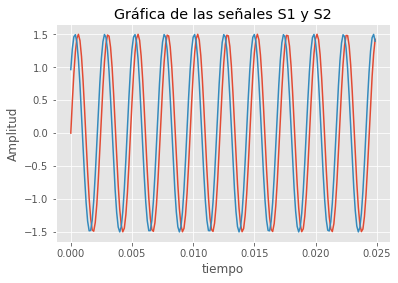

In [2]:
frecuencia_muestreo = 8000
amplitud = 1.5
frecuencia = 410
cantidad_muestras = 200
theta = np.deg2rad(40)

# COMPLETAR

# Sample spacing
T = 1 / frecuencia_muestreo

# Array de tiempo
tiempo = np.arange(0, cantidad_muestras/frecuencia_muestreo, T)

# Array para S1
S1 = amplitud * np.sin(2 * np.pi * frecuencia * tiempo)
# print(S1)

# Array para S2
S2 = amplitud * np.sin(2 * np.pi * frecuencia * tiempo + theta)
# print(S2)

# Plot S1 y S2 en la misma gráfica
plt.figure()
plt.plot(tiempo, S1)
plt.plot(tiempo, S2)
plt.title('Gráfica de las señales S1 y S2')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.show()

## Parte 5 - Transformada de Fourier
Calcular la transformada de Fourier de la señal sinusoidal S1 de la parte anterior.   
Usar funciones del módulo scipy.fftpack   

In [ ]:
# COMPLETAR  calcular y graficar
TdF_S1 = fft(S1)

## Parte 6 - Cargar datos desde un archivo de texto
Existen diversas librerías para cargar datos desde archivos, acá proponemos usar dos: numpy y pandas. En general numpy es más sencilla de usar, pero pandas es más potente. 

### Parte 6.1 - Cargar datos de un archivo de texto con funciones de numpy
Usar las funciones ```np.loadtxt(...)``` o ```np.genfromtxt(...)``` para cargar los datos del archivo ```datos.csv``` en el directorio ```data``` a un array *numpy*.  
Tener en cuenta que los datos están en columnas separados por ',' y que en la primera fila se encuentran los encabezados.


In [ ]:
# COMPLETAR cargar los datos a un array, mostrar propiedades del array y graficar

### Parte 6.2 - Cargar datos de un archivo de texto con funciones de pandas
Usar la función pd.read_csv(...) del módulo pandas para leer los datos  del archivo ```datos.csv``` en el directorio data a un *dataframe*. Obtener a partir del *dataframe* un array de *numpy*.

In [ ]:
# COMPLETAR cargar los datos a un dataframe, mostrar propiedades del dataframe, 
# obtener el array de numpy y graficar

## Parte 7 - Operaciones 


### Calcular promedios

In [ ]:
#np.random.seed(789)   #descomentar para chequear los resultados, comentar para que p cambie  en cada corrida
p = np.random.rand(10,3)
print(p)

# calcular la media de todos los elementos de p:   0.48544143187616673
# COMPLETAR


# calcular la media de las columnas de p.          [0.54815742 0.39199966 0.51616722]
# COMPLETAR


# calcular la media de las filas de p.             
# [0.44912027 0.78623868 0.04879567 0.37839235 0.58661954 0.32941742 0.2934381  0.51920083 0.71125536 0.75193609]
# COMPLETAR







### Suma ponderada de dos arrays

In [ ]:
# Realizar la suma ponderada de las señales S1 y S2 de la parte 3 con pesos 0.3 y 0.7 respectivamente
# COMPLETAR : calcular la suma ponderada y graficar


## Parte 8 - Funciones
Definir una función que realice la suma ponderada mencionada en la parte anterior.   
La función recibe dos arrays y dos pesos. Dentro de la función se chequea que los dos arrays sean de la mismas dimensiones, se realiza la suma ponderada y se devuelve el array resultado.



In [ ]:
def suma_ponderada(array1, array2, peso1, peso2):
    # COMPLETAR
    
    
    return resultado


# usar la función
W = suma_ponderada(S1, S2, 0.3, 0.7)

# COMPLETAR graficar